# Examen 1: Métodos computacionales.

## Profesor: Hernán Salinas
### Universidad de Antioquia


El examen consta de 7 puntos, cada uno de igual valor, el uso de herramientas de IA no esta permitido. Puede usar la documentacion de scipy, numpy, matplotlib.

La entrega se realiza a través del github del curso.


#### Examen

Una esfera de masa $m$ es lanzada desde la superficie de la tierra con velocidad $\vec{v_0}$. Las fuerzas que actúan sobre la bolita son: el peso $m\vec{g}$, y la fuerza de rozamiento $\vec{f}=-mb\vec{v}_0$ que el  aire ejerce sobre la bolita. Un digrama de cuerpo libre es esquematizado en la siguiente figura.

![Movimiento parabolico](http://www.sc.ehu.es/sbweb/fisica/dinamica/stokes2/stokes1.gif)

Para dar solución al movimiento de la bolita, se debe plantear las ecuaciones de movimiento desde la segunda ley de Newton y después solucionarla para encontrar la ecuaciones de posición y velocidad. Su tarea será determinar el valor del alcance máximo para diferentes ángulos de lanzamiento. Para ello lea detenidamente lo siguiente:  

Las **ecuaciones de movimiento** de la bolita vienen dadas por:
\begin{equation}
m\frac{\mathrm{d}v_x}{\mathrm{d}t} = - mbv_x
\end{equation}


\begin{equation}
m\frac{\mathrm{d}v_y}{\mathrm{d}t} = - mg-mbv_y
\end{equation}


donde:

$v_{0x}=v_0\cos \theta$,  $v_{0y}=v_0\sin \theta$,  $b$ el coeficiente de rozamiento con el aire, y $g$ la aceleración de la gravedad


La solución a las ecuaciones anteriores para la **posición ($x$, $y$) y la velocidad ($v_x$, $v_y$)**  son:


\begin{equation}
x =  \frac{v_{0x}}{b}\left( 1-e^{-bt} \right)
\end{equation}

\begin{equation}
y =  \frac{1}{b}\left( \frac{g}{b}+v_{0y}\right)(1-e^{-bt})-\frac{g}{b}t
\end{equation}


\begin{equation}
v_x = v_{0x}e^{-bt}
\end{equation}

\begin{equation}
v_y = \left(\frac{g}{b}+v_{0y} \right) e^{-bt}-\frac{g}{b}
\end{equation}



**Alcance máximo**

El tiempo asociado al alcance máximo del proyectil se da cuando $x=R$, despejando de la ecuación para $x$ el tiempo, se tiene que:

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

Reemplanzando en la ecuación para $y$ obtenemos que:
\begin{equation}
y =\left(\frac{g}{b} + v_{0y}  \right) \frac{R}{v_{0x}}+\frac{g}{b^2}\ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

El alcance máximo R, estará deteminado cuando $y=0$ en la anterior ecuación. Notese que es una ecuación trascendental. Su tarea será determinar el valor de R para diferentes ángulos de lanzamiento, para ello realice lo siguiente:





1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$



2. Asumiendo que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  


4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

Ahora,  vamos a mostrar la trayectoria para múltiples ángulos de lanzamiento.

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.

6. Realice un gráfico de $R$ vs $t_v$

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.













In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize

1. Construir una función de python paramétrica para determinar el valor de R.
$y = f(R, \theta, v_{ox},v_{oy},b,g)$

In [ ]:
def posiciony(R,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0x=v0*np.cos(theta)
  v0y=v0*np.sin(theta)
  y1=R/v0x
  y2=v0y+g/b
  y3=g/b**2
  y4=np.log(1-R*b/v0x)
  y=y1*y2+y3*y4
  return y


2. Asumiendo que la bolita es lanzada con una rapidez de
$v_0=55\mathrm{m}/\mathrm{s}$ y un ángulo de $45^{\circ}$ respecto a la horizontal, $b=0.005$ y $g=9.8\mathrm{m}/\mathrm{s^2}$, determine el alcance máximo. Emplee el método que desee.


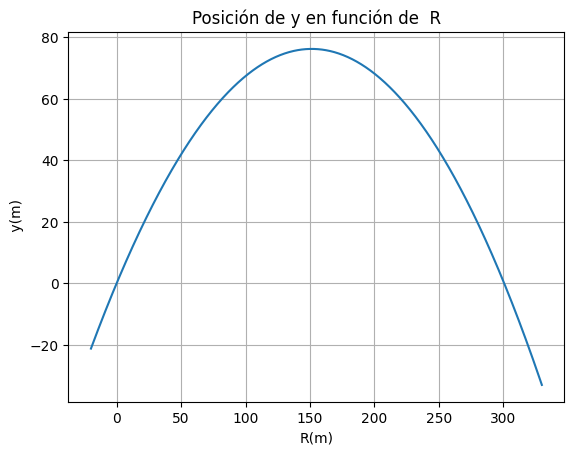

In [ ]:
theta=45
v0=55
b=0.005
g=9.8
R=np.linspace(-20, 330, 1000)
y1=posiciony(R,theta,v0,b,g)
plt.plot(R,y1)
plt.title("Posición de y en función de  R")
plt.xlabel("R(m)")
plt.ylabel(" y(m)")
plt.grid()
plt.show()

In [ ]:
newton=optimize.newton(posiciony,400,args=(theta,v0,b,g)) #método de la secante
print(f'El alcance máximo(R) se da a los {newton} m')

El alcance máximo(R) se da a los 300.69207669317814 m


3. Valide el resutado anterior, con un método diferente al que empleo en el apartado anterior y además, determine el tiempo de vuelo $t_v$.  

\begin{equation}
t_v=-\frac{1}{b} \ln \left(1-\frac{Rb}{v_{0x}} \right)
\end{equation}

In [ ]:
#Utilicemos el método del punto fijo para calcular la raíz
def g1(x0, theta,v0,b,g):
  g=x0-posiciony(x0,theta,v0,b,g)
  return g

fixed=optimize.fixed_point(g1,400,args=(theta,v0,b,g))
print(f'El alcance máximo(R) utilizando el método del punto fijo se da a los {fixed} m')

El alcance máximo(R) utilizando el método del punto fijo se da a los 300.69207669320724 m


In [ ]:
def tiempo_vuelo(R,b,v0,theta):
  theta=np.deg2rad(theta)
  v0x=v0*np.cos(theta)
  tv=-np.log(1-R*b/v0x)/b
  return tv

In [ ]:
tiempo_v=tiempo_vuelo(optimize.fixed_point(g1,400,args=(theta,v0,b,g)),0.005,55,45)
print(f'El tiempo de vuelo de la pelotica es de {tiempo_v:.3} s')

El tiempo de vuelo de la pelotica es de 7.89 s



4. Construya una gráfica de $x$ vs $t$, $y$ vs $t$, $x$ vs $y$. Asegurese de  no superar en las trayectorias los tiempos establecidos por el  tiempo de vuelo $t_v$.

In [ ]:
def pos_x(t,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0x=v0*np.cos(theta)
  x=v0x*(1-np.exp(-b*t))/b
  return x

def pos_y(t,theta,v0,b,g):
  theta=np.deg2rad(theta)
  v0y=v0*np.sin(theta)
  y1=(v0y+g/b)/b
  y2=(1-np.exp(-b*t))
  y3=g*t/b
  y=y1*y2-y3
  return y

In [ ]:
theta=45
v0=55
b=0.005
g=9.8
t = np.linspace(0,tiempo_v,50)
x=pos_x(t,theta,v0,b,g)
y=pos_y(t,theta=45,v0=55,b=0.005,g=9.8)

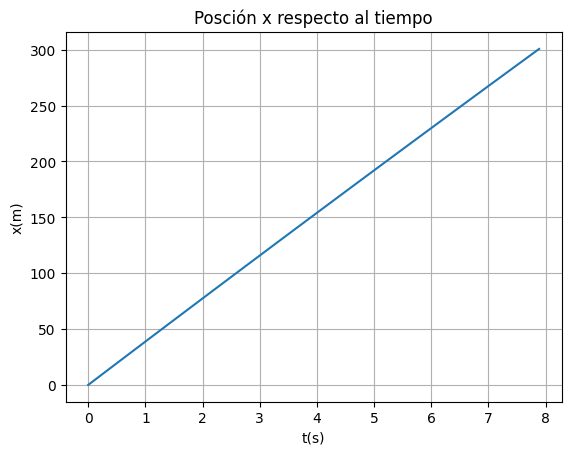

In [ ]:
plt.plot(t,x)
plt.title("Posción x respecto al tiempo")
plt.xlabel("t(s)")
plt.ylabel("x(m)")
plt.grid()
plt.show()

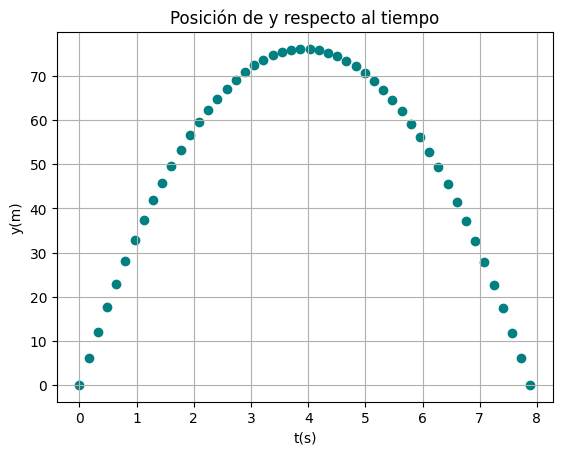

In [ ]:
plt.scatter(t,y,color='teal')
plt.title("Posición de y respecto al tiempo")
plt.xlabel("t(s)")
plt.ylabel("y(m)")
plt.grid()
plt.show()

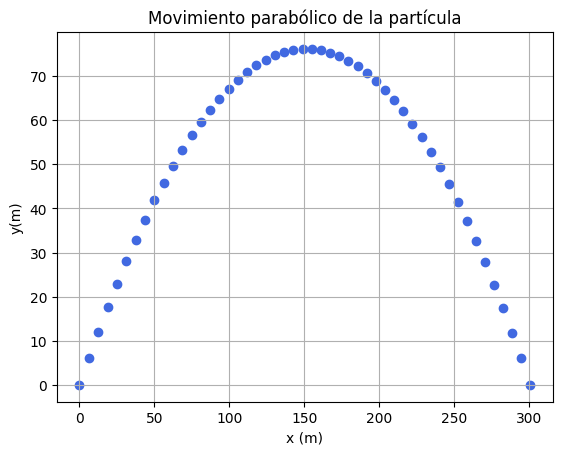

In [ ]:
plt.scatter(x,y,color='royalblue')
plt.title("Movimiento parabólico de la partícula")
plt.xlabel("x (m)")
plt.ylabel("y(m)")
plt.grid()
plt.show()

5. Suponiendo,  $b=0.009$, $v_0 = 40\mathrm{m}/\mathrm{s}$ y  $\theta$ entre $0<\theta<90^{\circ}$ en pasos de $5^{\circ}$:
```python
theta=np.arange(0, 90, 5)
theta=np.deg2rad(theta)
```


generalice el resultado del punto  número 2  para determinar el conjunto de valores de R asociados a cada ángulo. Con lo anterior determine los tiempos de vuelo.


In [ ]:
theta=np.arange(0.01,90,5) #0°<θ<90°
r=[]
tv=[]

for i in theta:
  x0=i+50
  R0=optimize.newton(posiciony,x0,args=(i,40,0.009,9.8))
  r.append(R0)
  tvuelo=tiempo_vuelo(R0,0.009,40,i)
  tv.append(tvuelo)
  print(f'Si theta = {i}°, entonces  su alcance máximo(R) es de {R0:.4}m y su tiempo de vuelo es de {tiempo_vuelo(R0,0.009,40,i):.4}s')

Si theta = 0.01°, entonces  su alcance máximo(R) es de 0.05699m y su tiempo de vuelo es de 0.001425s
Si theta = 5.01°, entonces  su alcance máximo(R) es de 28.29m y su tiempo de vuelo es de 0.7121s
Si theta = 10.01°, entonces  su alcance máximo(R) es de 55.42m y su tiempo de vuelo es de 1.416s
Si theta = 15.01°, entonces  su alcance máximo(R) es de 80.66m y su tiempo de vuelo es de 2.108s
Si theta = 20.01°, entonces  su alcance máximo(R) es de 103.3m y su tiempo de vuelo es de 2.782s
Si theta = 25.01°, entonces  su alcance máximo(R) es de 122.6m y su tiempo de vuelo es de 3.434s
Si theta = 30.01°, entonces  su alcance máximo(R) es de 138.0m y su tiempo de vuelo es de 4.058s
Si theta = 35.01°, entonces  su alcance máximo(R) es de 149.2m y su tiempo de vuelo es de 4.651s
Si theta = 40.01°, entonces  su alcance máximo(R) es de 155.9m y su tiempo de vuelo es de 5.208s
Si theta = 45.01°, entonces  su alcance máximo(R) es de 157.8m y su tiempo de vuelo es de 5.724s
Si theta = 50.01°, entonce

6. Realice un gráfico de $R$ vs $t_v$

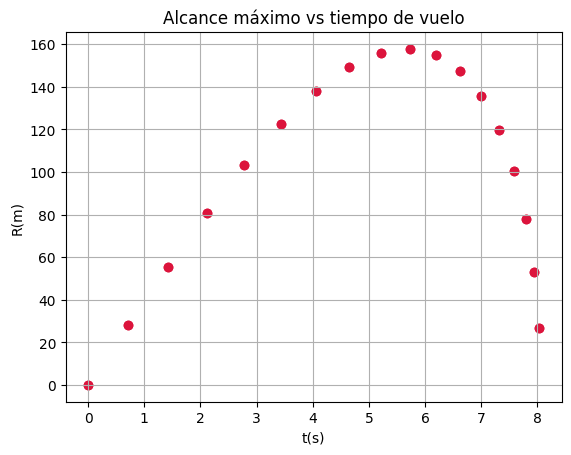

In [ ]:
plt.scatter(tv,r,color='crimson')
plt.title("Alcance máximo vs tiempo de vuelo")
plt.xlabel("t(s)")
plt.ylabel("R(m)")
plt.grid()
plt.show()

7. Finalmente, construya todas las trayectorias ($y$ vs $x$) para cada ángulo $\theta$.

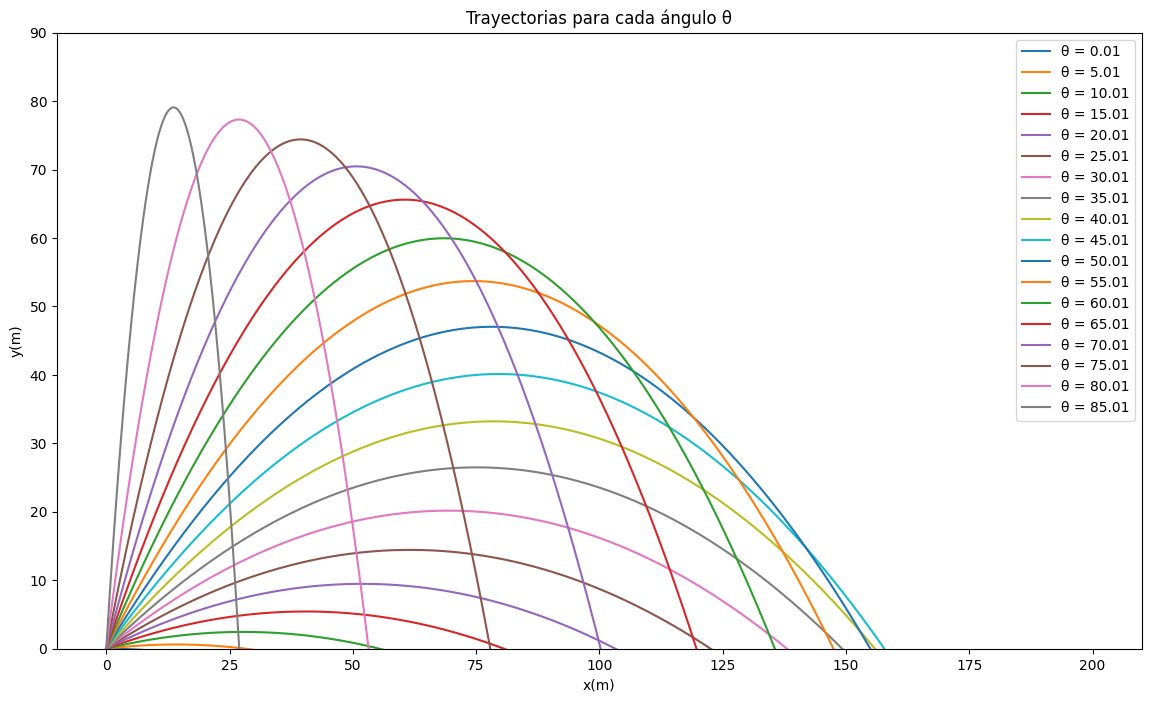

In [ ]:
theta=np.arange(0.01,90,5) #0°<θ<90°
R=np.linspace(0,200,10000)

plt.figure(figsize=(14,8))
for i in theta:
  x0=i+50
  R0=optimize.newton(posiciony,x0,args=(i,40,0.009,9.8))
  r.append(R0)
  tvuelo=tiempo_vuelo(R0,0.009,40,i)
  tv.append(tvuelo)
  plt.plot(R,posiciony(R,i,40,0.009,9.8),label=f'θ = {i}')
  plt.ylim(0,90)
  plt.title("Trayectorias para cada ángulo θ")
  plt.xlabel("x(m)")
  plt.ylabel("y(m)")
  plt.legend()
  plt.grid()
plt.show()